In [61]:
import handcalcs.render
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import CoolProp 
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import Props
from CoolProp.CoolProp import PropsSI
from CoolProp.HumidAirProp import HAPropsSI

DADOS DE ENTRADA

In [102]:

T_1=100 #°C-temperatura inferior
T_1_Abs=T_1+273.15
T_2=50 #°C-temperatura superior
T_2_Abs=T_2+273.15
T_p=60 #°C-temperatura da placa
T_p_Abs=T_p+273.15
T_a=20 #°C -temperatura do ar ambiente
T_a_Abs=T_a+273.15
L_vidro=0.005 #m - espessura do vidro(borosilicato)
L_placaevidro=0.02 #m-espaçamento entre a placa e a cobertura de vidro
L_la= 0.03 #m-isolamento de lã de vidro
epsilon_vidro=0.925 #m - Apendice A Incropera
epsilon_placaaluminio=0.84 #Apendice A Incropera 
epsilon_1=0.2 #consideração do slide
epsilon_2=0.8 #consideração do slide
k_la= 0.045 #m-isolamento de lã de vidro Apendice A Incropera
beta_vi= 23 #° -inclinação da placa 
g=9.81 #gravidade
#considerando a umidade relativa como 60%
A_1=1
A_2=A_1
F_12=1
sigma=5.667*10**-8

DADOS TERMODINÂMICOS

In [63]:
 
k=30.0*10**-3 #W/mK 
beta_linha=2.874*10**-3 #K^-1
nu= 20.92*10**-6 #m^2/s
alpha = 29.9*10**-6 #m^2/s

VALORES RETIRADAS DA UMIDADE DO AR 

In [64]:
T_carta=11.2
T_db=T_carta+273.15
T_db

284.34999999999997

TEMPERATURA DO CEU PARAMETRO 1

In [65]:

T_SKY_1= 0.0552*T_a_Abs**1.5

TEMPERATURA DO CEU PARAMETRO 2

In [66]:


T_SKY_2= T_a_Abs*(0.8+(T_db-273)/250)**0.25

TEMPERATURA DO CEU(T_SKY)

In [67]:

T_SKY= (T_SKY_1+T_SKY_2)/2

RESISTÊNCIA TERMICA POR RADIAÇÃO VIDRO-CEU

In [68]:

h_R2= epsilon_vidro*sigma*(T_SKY**2+T_1_Abs**2)*(T_SKY+T_1_Abs)



In [69]:

RT_R2= 1/h_R2

Gcd=q_te+q_tr1+q_tc1+q_tk


Resistência Térmica Equivalente na Radiação

As placas são muito extensas quando comparadas com o seu espaçamento e se
comportam como corpos negros

POTÊNCIA EMISSIVA DE UM CORPO NEGRO 

In [70]:
%%render
E_b1= sigma*T_1_Abs**4
E_b2= sigma*T_2_Abs**4

<IPython.core.display.Latex object>

EMISSIVIDADE PLACA-VIDRO

In [71]:
%%render

h_r= (sigma*(T_2_Abs**2+T_1_Abs**2)*(T_2_Abs+T_1_Abs))/(((1-epsilon_placaaluminio)/epsilon_placaaluminio)+(1/F_12)+((1-epsilon_vidro)*A_1)/(epsilon_vidro*A_2)) 
R_T= 1/h_r

<IPython.core.display.Latex object>

In [72]:

beta_linha

0.0028740000000000003

Resistências Térmicas de Convecção

Numero de Prandt

In [106]:

Pr = nu / alpha

Numero de Grashof

In [105]:

Gr= (g*L_placaevidro**3*beta_linha*(T_1_Abs-T_2_Abs))/nu

In [104]:

Ra_1= (g*L_placaevidro**3*beta_linha*(T_1_Abs-T_2_Abs))/(nu*alpha) 

Numero de Rayleigh -espaçamento de 0.02

Numero de Holland


In [103]:

Nu_h_1= 1+1.44*(1-(1708)/(Ra_1*np.cos(np.radians(beta_vi))))*(1-(1708)/(Ra_1*np.cos(np.radians(beta_vi)))*np.sin(np.radians(beta_vi*1.8)**1.6))+((Ra_1*np.cos(np.radians(beta_vi))/5830)**(1/3)-1)

Análise Coletor Solar Plano

Placa - Vidro

In [77]:
%%render
h_c= Nu_h_1*k*L_placaevidro

<IPython.core.display.Latex object>

In [78]:
%%render
Rtc= 1/h_c

<IPython.core.display.Latex object>

In [101]:
%%render
qc= h_c*(T_2-T_1)

<IPython.core.display.Latex object>

Resistência Térmica Equivalente na Radiação

In [99]:
%%render

h_R1= (sigma*(T_p_Abs**2+T_1_Abs**2)*(T_2_Abs+T_1_Abs))/(((1-epsilon_1)/epsilon_1)+(1/F_12)+((1-epsilon_2))/(epsilon_2))


<IPython.core.display.Latex object>

In [100]:
%%render
Q_r12= h_R1*(T_2-T_1) #W/m^2

<IPython.core.display.Latex object>

Vidro - Céu

In [107]:
T_v_Abs=503.13

Resistências Térmicas por Radiação
Placa - Vidro

In [109]:
%%tex

h_R1= (sigma*(T_p_Abs**2+T_v_Abs**2)*(T_p_Abs+T_v_Abs))/(((1-epsilon_placaaluminio)/epsilon_placaaluminio)+(1/F_12)+((1-epsilon_vidro))/(epsilon_vidro))

\[
\begin{aligned}
h_{R1} &= \frac{ \sigma \cdot \left( \left( T_{p_{Abs}} \right) ^{ 2 } + \left( T_{v_{Abs}} \right) ^{ 2 } \right) \cdot \left( T_{p_{Abs}} + T_{v_{Abs}} \right) }{ \left( \frac{ 1 - \epsilon_{placaaluminio} }{ \epsilon_{placaaluminio} } \right) + \left( \frac{ 1 }{ F_{12} } \right) + \frac{ 1 - \epsilon_{vidro} }{ \epsilon_{vidro} } } \\&= \frac{ 5.667 \times 10 ^ {-8 } \cdot \left( \left( 333.15 \right) ^{ 2 } + \left( 503.13 \right) ^{ 2 } \right) \cdot \left( 333.15 + 503.13 \right) }{ \left( \frac{ 1 - 0.84 }{ 0.84 } \right) + \left( \frac{ 1 }{ 1 } \right) + \frac{ 1 - 0.925 }{ 0.925 } } \\&= 13.571  \\
\end{aligned}
\]


In [113]:
%%tex
Tr= 1/h_R1

\[
\begin{aligned}
\mathrm{Tr} &= \frac{ 1 }{ h_{R1} }  = \frac{ 1 }{ 13.571 } &= 7.368 \times 10 ^ {-2 }  
\end{aligned}
\]


Vidro - Céu

In [112]:
%%tex
h_r2= epsilon_vidro*sigma*(T_SKY**2+T_v_Abs**2)*(T_SKY+T_v_Abs)

\[
\begin{aligned}
h_{r2} &= \epsilon_{vidro} \cdot \sigma \cdot \left( \left( T_{SKY} \right) ^{ 2 } + \left( T_{v_{Abs}} \right) ^{ 2 } \right) \cdot \left( T_{SKY} + T_{v_{Abs}} \right) \\&= 0.925 \cdot 5.667 \times 10 ^ {-8 } \cdot \left( \left( 279.078 \right) ^{ 2 } + \left( 503.13 \right) ^{ 2 } \right) \cdot \left( 279.078 + 503.13 \right) \\&= 13.573  \\
\end{aligned}
\]


In [114]:
%%tex
TR_2= 1/h_r2

\[
\begin{aligned}
\mathrm{TR}_{2} &= \frac{ 1 }{ h_{r2} }  = \frac{ 1 }{ 13.573 } &= 7.368 \times 10 ^ {-2 }  
\end{aligned}
\]


In [116]:
%%tex
R_TK= L_la/k_la

\[
\begin{aligned}
R_{TK} &= \frac{ L_{la} }{ k_{la} }  = \frac{ 0.03 }{ 0.045 } &= 6.667 \times 10 ^ {-1 }  
\end{aligned}
\]


In [119]:
%%tex
Q_k= (T_p_Abs-T_SKY)/RTK

\[
\begin{aligned}
Q_{k} &= \frac{ T_{p_{Abs}} - T_{SKY} }{ \mathrm{RTK} }  = \frac{ 333.15 - 279.078 }{ 6.667 \times 10 ^ {-1 } } &= 81.108  
\end{aligned}
\]


In [123]:

Q_p=172.62

In [128]:
%%tex
R_te= (T_p_Abs-T_a_Abs)/(Q_p)

\[
\begin{aligned}
R_{te} &= \frac{ T_{p_{Abs}} - T_{a_{Abs}} }{ Q_{p} }  = \frac{ 333.15 - 293.15 }{ 172.62 } &= 2.317 \times 10 ^ {-1 }  
\end{aligned}
\]


In [130]:
%%tex
U_L= 1/R_te

\[
\begin{aligned}
U_{L} &= \frac{ 1 }{ R_{te} }  = \frac{ 1 }{ 2.317 \times 10 ^ {-1 } } &= 4.316  
\end{aligned}
\]


In [134]:
T_fi=np.array(list(range(10,50,1)))
T_fi

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])

In [140]:
FR=0.9
tau=0.885
alpha=0.95
GT=1000

In [151]:

ni=FR*(tau*alpha)-(FR*U_L*(T_fi-T_a))/GT


Text(0, 0.5, 'rendimento')

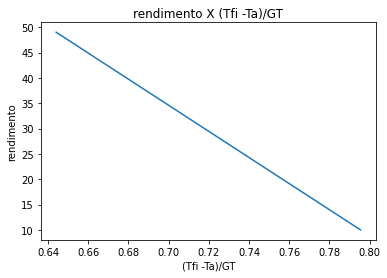

In [149]:
plt.plot(ni,T_fi)

plt.title('rendimento X (Tfi -Ta)/GT')
plt.xlabel('(Tfi -Ta)/GT')
plt.ylabel('rendimento')